In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
sys.path.append('../')
from plot_utils import *
from preprocess_datasets import load_features_outcomes, make_training_sets
from run_models import run_cph, eval_cph
from estimators_demo_utils import plot_performance_metrics

# Make training sets if they haven't been created yet

device = 'cmod'
dataset = 'random100'
numeric_feats = ['ip','Wmhd','n_e','kappa','li']

make_training_sets(device, dataset)

Training shots: 59
Test shots: 20
Validation shots: 20


In [2]:
from auton_survival.preprocessing import Preprocessor
# Load and preprocess training, test, validation sets
outcomes_train, features_train = load_features_outcomes(device, dataset+'_train')
outcomes_test, features_test = load_features_outcomes(device, dataset+'_test')
outcomes_val, features_val = load_features_outcomes(device, dataset+'_val')

# Fit the imputer and scaler to the training data and transform the training, test, and validation data
preprocessor = Preprocessor(cat_feat_strat='ignore', num_feat_strat='mean')
transformer=preprocessor.fit(features_train, cat_feats=[], num_feats=numeric_feats, one_hot=True, fill_value=-1)

x_train = transformer.transform(features_train)
x_test = transformer.transform(features_test)
x_val = transformer.transform(features_val)

y_train = outcomes_train
y_test = outcomes_test
y_val = outcomes_val


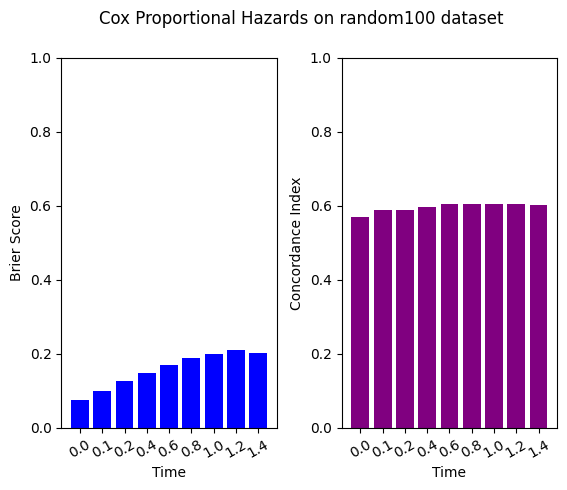

In [7]:
# Run all the models

cph_model = run_cph(x_train, x_val, y_train, y_val)


# Evaluate all the models

cph_results, cph_times = eval_cph(cph_model, x_test, y_train, y_test)

# Plot the results
cph_title = 'Cox Proportional Hazards on ' + dataset + ' dataset'
plot_performance_metrics(cph_results, cph_times, cph_title)